## Data Loading

In [47]:
DATA_FOLDER = '../data/'
VARIABLE_FOLDER = '../variables/'
FIGURE_FOLDER = '../reports/'

In [48]:
import numpy as np
import pandas as pd

df = pd.read_csv(DATA_FOLDER + 'processed/sentiments.csv')

In [49]:
# df[query == 'lzy7693'] = [] edit this later (remove this query)

In [50]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'net', 'topic', 'negative', 'neutral', 'positive', 'date_year'], inplace=True)

In [51]:
df['date'] = pd.to_datetime(df['date'])
# years = np.array(df['date_year'].unique(), dtype='int')

In [52]:
df.head()

,query,subreddit,type,author,content,date,upvotes,n_comments,len_text,Topic,Group,Keywords,datetime,net_t
0,semaglutide,trt,post,Zellenial,Trt works if you work it.. started 1.5 years a...,2023-03-09 18:01:51,24,77,39,9,3,"""semaglutide"", ""b12"", ""appetite"", ""week"", ""scans""",2023-03-09 18:01:51,0
1,semaglutide,trt,post,7856970,Which TRT clinics offer semaglutide?.,2023-02-19 12:22:42,1,13,5,7,1,"""semaglutide"", ""compounded"", ""compounding"", ""c...",2023-02-19 12:22:42,0
2,semaglutide,trt,post,Bud1985,Semaglutide. Anyone in here have experience ta...,2023-02-02 14:56:14,4,17,35,9,3,"""semaglutide"", ""b12"", ""appetite"", ""week"", ""scans""",2023-02-02 14:56:14,0
3,semaglutide,trt,post,Hormonesforme-com,Semaglutide is a revolutionary fat loss medica...,2022-07-30 15:05:59,2,0,523,9,3,"""semaglutide"", ""b12"", ""appetite"", ""week"", ""scans""",2022-07-30 15:05:59,0
4,semaglutide,trt,post,Hey_its_Jack,Doctors office changed criteria for 'normal le...,2023-05-11 10:38:49,10,66,154,11,3,"""pcos"", ""testosterone"", ""hair"", ""birth"", ""trt""",2023-05-11 10:38:49,-1


## Visualization Settings

In [53]:
# import matplotlib
# import matplotlib.pyplot as plt
import seaborn as sns

config = {
    'axis_label': 14,
    'tick_label': 12,
    'title': 20,
    'subplot_title': 16,
}

# Set the theme without grid
sns.set_style("white")

# Set your desired palette
my_palette = sns.color_palette("Paired")

# Set the palette for all figures
sns.set_palette(my_palette)

## Data Exploration

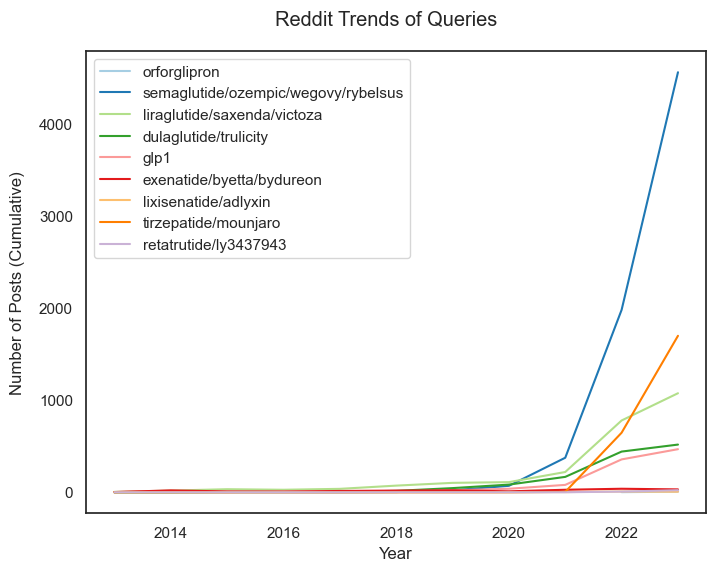

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame named 'data_frame'
# Replace 'data_frame' with your actual DataFrame name

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group data by 'query' and 'year' and count the number of posts
grouped_data = df.groupby(['query', df['date'].dt.year])['query'].count().unstack()

# Combine similar query categories
grouped_data.loc['glp1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()

# Drop rows related to specific query variations
grouped_data = grouped_data.drop(['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
                                  'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
                                  'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
                                  'adlyxin', 'retatrutide', 'ly3437943'])

# Reorder rows
grouped_data = grouped_data.iloc[[0, 2, 4, 5, 1, 6, 7, 3, 8]]

# Calculate year-to-year differences
# grouped_data = grouped_data.diff(axis=1).fillna(0)

# Plotting
with sns.plotting_context('notebook'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    for query in grouped_data.index:
        line, = plt.plot(grouped_data.columns, grouped_data.loc[query], label=query)
        last_value = grouped_data.loc[query].iloc[-1]  # Get the last value of the data series
        # plt.annotate(f"{last_value}", xy=(grouped_data.columns[-1], last_value), color=line.get_color())

    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Posts (Cumulative)', labelpad=10)
    fig.suptitle('Reddit Trends of Queries', y=0.95)
    plt.legend()
    # plt.grid(True)
    plt.savefig(FIGURE_FOLDER + 'figures/Reddit_Trends_of_Queries.png', bbox_inches='tight', transparent=True)


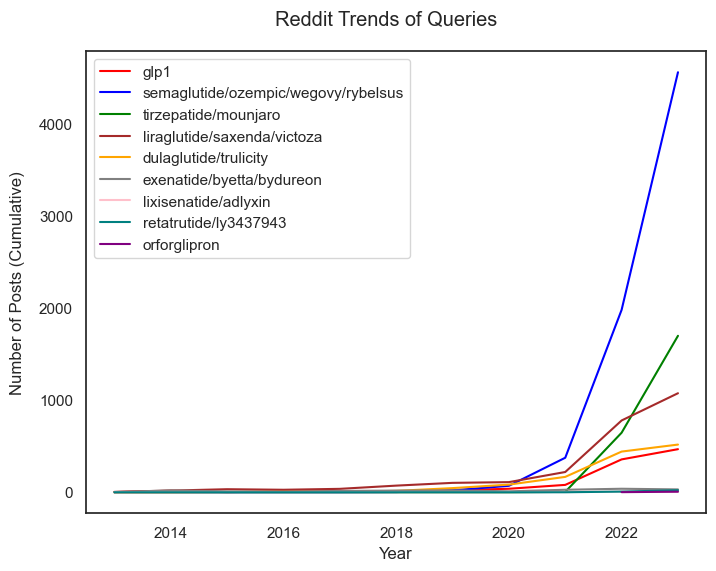

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group data by 'query' and 'year' and count the number of posts
grouped_data = df.groupby(['query', df['date'].dt.year])['query'].count().unstack()

# Combine similar query categories
grouped_data.loc['glp1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()

# Drop rows related to specific query variations
grouped_data = grouped_data.drop(['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
                                  'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
                                  'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
                                  'adlyxin', 'retatrutide', 'ly3437943'])

# # Reorder rows
# grouped_data = grouped_data.iloc[[0, 2, 4, 5, 1, 6, 7, 3, 8]]

# Query colors dictionary
query_colors = {
    'glp1': 'red',
    'semaglutide/ozempic/wegovy/rybelsus': 'blue',
    'tirzepatide/mounjaro': 'green',
    'liraglutide/saxenda/victoza': 'brown',
    'dulaglutide/trulicity': 'orange',
    'exenatide/byetta/bydureon': 'grey',
    'lixisenatide/adlyxin': 'pink',
    'retatrutide/ly3437943': 'teal',
    'orforglipron': 'purple',
}

# Sort queries based on the predefined color order
sorted_queries = sorted(grouped_data.index, key=lambda q: list(query_colors.keys()).index(q))

# Plotting
with sns.plotting_context('notebook'):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    for query in sorted_queries:
        line, = plt.plot(grouped_data.columns, grouped_data.loc[query], label=query, color=query_colors[query])

    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Posts (Cumulative)', labelpad=10)
    fig.suptitle('Reddit Trends of Queries', y=0.95)
    plt.legend()
    plt.savefig(FIGURE_FOLDER + 'figures/Reddit_Trends_of_Queries.png', bbox_inches='tight', transparent=True)
    plt.show()


In [56]:
grouped_data_reddit = grouped_data

In [57]:
# import pandas as pd
# import matplotlib.pyplot as plt
#
# # Load your DataFrame named 'data_frame'
# # Replace 'data_frame' with your actual DataFrame name
#
# # Convert 'date' column to datetime
# df['date'] = pd.to_datetime(df['date'])
#
# # Group data by 'query' and 'year' and count the number of posts
# grouped_data = df.groupby(['query', df['date'].dt.year])['query'].count().unstack()
# # grouped_data = df.resample('12M').count()
#
# # Combine similar query categories
# grouped_data.loc['glp1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
# grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
# grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
# grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
# grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
# grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
# grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
# grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()
#
# # Drop rows related to specific query variations
# grouped_data = grouped_data.drop(['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
#                                   'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
#                                   'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
#                                   'adlyxin', 'retatrutide', 'ly3437943'])
#
# # Reorder rows
# # grouped_data = grouped_data.iloc[[0, 2, 4, 5, 1, 6, 7, 3, 8]]
#
# # Calculate year-to-year differences
# grouped_data_diff = grouped_data.diff(axis=1).fillna(0)
#
# # Plotting
# with sns.plotting_context('notebook'):
#     fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#
#     ax2 = ax.twinx()
#
#     for query in grouped_data.index:
#         line, = ax.plot(grouped_data.columns, grouped_data.loc[query], label=query)
#         last_value = grouped_data.loc[query].iloc[-1]
#
#         # Add a gradient line
#         gradient_color = line.get_color()
#         ax2.plot(grouped_data_diff.columns, grouped_data_diff.loc[query], color=gradient_color, linestyle='dashed')
#
#         # Annotate the last value
#         # plt.annotate(f"{last_value}", xy=(grouped_data.columns[-1], last_value), color=gradient_color)
#
#     ax2.set_ylim(ax.get_ylim())
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Cumulative Number of Posts (Solid Line)', labelpad=10)
#     ax2.set_ylabel('Number of Posts per Year (Dotted Line)', labelpad=10)  # Label for the twin axis
#     fig.suptitle('Reddit Trends of Queries', y=0.95)
#     fig.legend(title='Query Group', loc='upper left', bbox_to_anchor=(1, 1))
#     plt.savefig(FIGURE_FOLDER + 'figures/Reddit_Trends_of_Queries_Gradients.png', bbox_inches='tight', transparent=True)
#     plt.show()  # Display the plot


In [58]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# # Load your DataFrame named 'data_frame'
# # Replace 'data_frame' with your actual DataFrame name
#
# # Convert 'date' column to datetime
# df['date'] = pd.to_datetime(df['date'])
#
# # Group data by 'query' and 'year' and count the number of posts
# grouped_data = df.groupby(['query', df['date'].dt.year])['query'].count().unstack().cumsum()
#
# # Combine similar query categories
# grouped_data.loc['glp1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
# grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
# grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
# grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
# grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
# grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
# grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
# grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()
#
# # Drop rows related to specific query variations
# grouped_data = grouped_data.drop(['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
#                                   'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
#                                   'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
#                                   'adlyxin', 'retatrutide', 'ly3437943'])
#
#
# # Create a 3x3 grid of subplots
# num_queries = len(grouped_data.index)
# num_rows = 3
# num_cols = 3
#
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), sharex=True)
# palette = sns.color_palette("Set1", n_colors=num_queries)
#
# query_colors = {
#     'glp1': 'red',
#     'semaglutide/ozempic/wegovy/rybelsus': 'blue',
#     'tirzepatide/mounjaro': 'green',
#     'liraglutide/saxenda/victoza': 'brown',
#     'dulaglutide/trulicity': 'orange',
#     'exenatide/byetta/bydureon': 'grey',
#     'lixisenatide/adlyxin': 'pink',
#     'retatrutide/ly3437943': 'teal',
#     'orforglipron': 'purple',
# }
#
# # Flatten the axes array for easier iteration
# axes = axes.flatten()
#
# # Create a common title for all subplots
# fig.suptitle("Reddit Trends of Queries", fontsize=16, y=1.02)
#
# # Plotting for each query
# for i, (query, ax) in enumerate(zip(grouped_data.index, axes)):
#     query_color = query_colors.get(query, palette[i])  # Use specific color if available, else use palette
#
#     ax.plot(grouped_data.columns, grouped_data.loc[query], label='Cumulative Posts', color=query_color)
#     # ax.set_ylabel('Cumulative Posts')
#
#     grouped_data_diff = grouped_data.diff(axis=1).fillna(0)
#     y_values = grouped_data_diff.loc[query]  # Year-to-year change in posts
#
#     # Create a twin y-axis for the year-to-year change
#     ax2 = ax.twinx()
#     ax2.plot(grouped_data_diff.columns, y_values, linestyle='dashed', label='Posts per Year', color=query_color)
#     # ax2.set_ylabel('Posts per Year')
#
#     lines, labels = ax.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     ax2.legend(lines + lines2, labels + labels2, loc='upper left')  # Combine legends
#
#     ax.set_title(f'Reddit Trends of {query}')
#
#     # Set years as x-axis
#     # ax.set_xticks(grouped_data.columns)
#     # ax.set_xticklabels(grouped_data.columns, rotation=45, ha='right')
#
#     # Set y-axis label only for the left-most subplots
#     if i % num_cols == 0:
#         ax.set_ylabel('Cumulative Posts')
#
#     # Set x-axis label only for the bottom-most subplots
#     if i >= (num_queries - num_cols):
#         ax.set_xlabel('Year')
#
#     # Set secondary y-axis label only for the right-most subplots
#     if (i + 1) % num_cols == 0:
#         ax2.set_ylabel('Posts per Year')
#
# # Set common labels and adjust layout
# # fig.text(0.5, 0.04, "Year", ha="center")
# plt.tight_layout()
#
# # Save the figure
# plt.savefig(FIGURE_FOLDER + 'figures/Reddit_Trends_of_Queries_Subplots.png', bbox_inches='tight', transparent=True)
# plt.show()


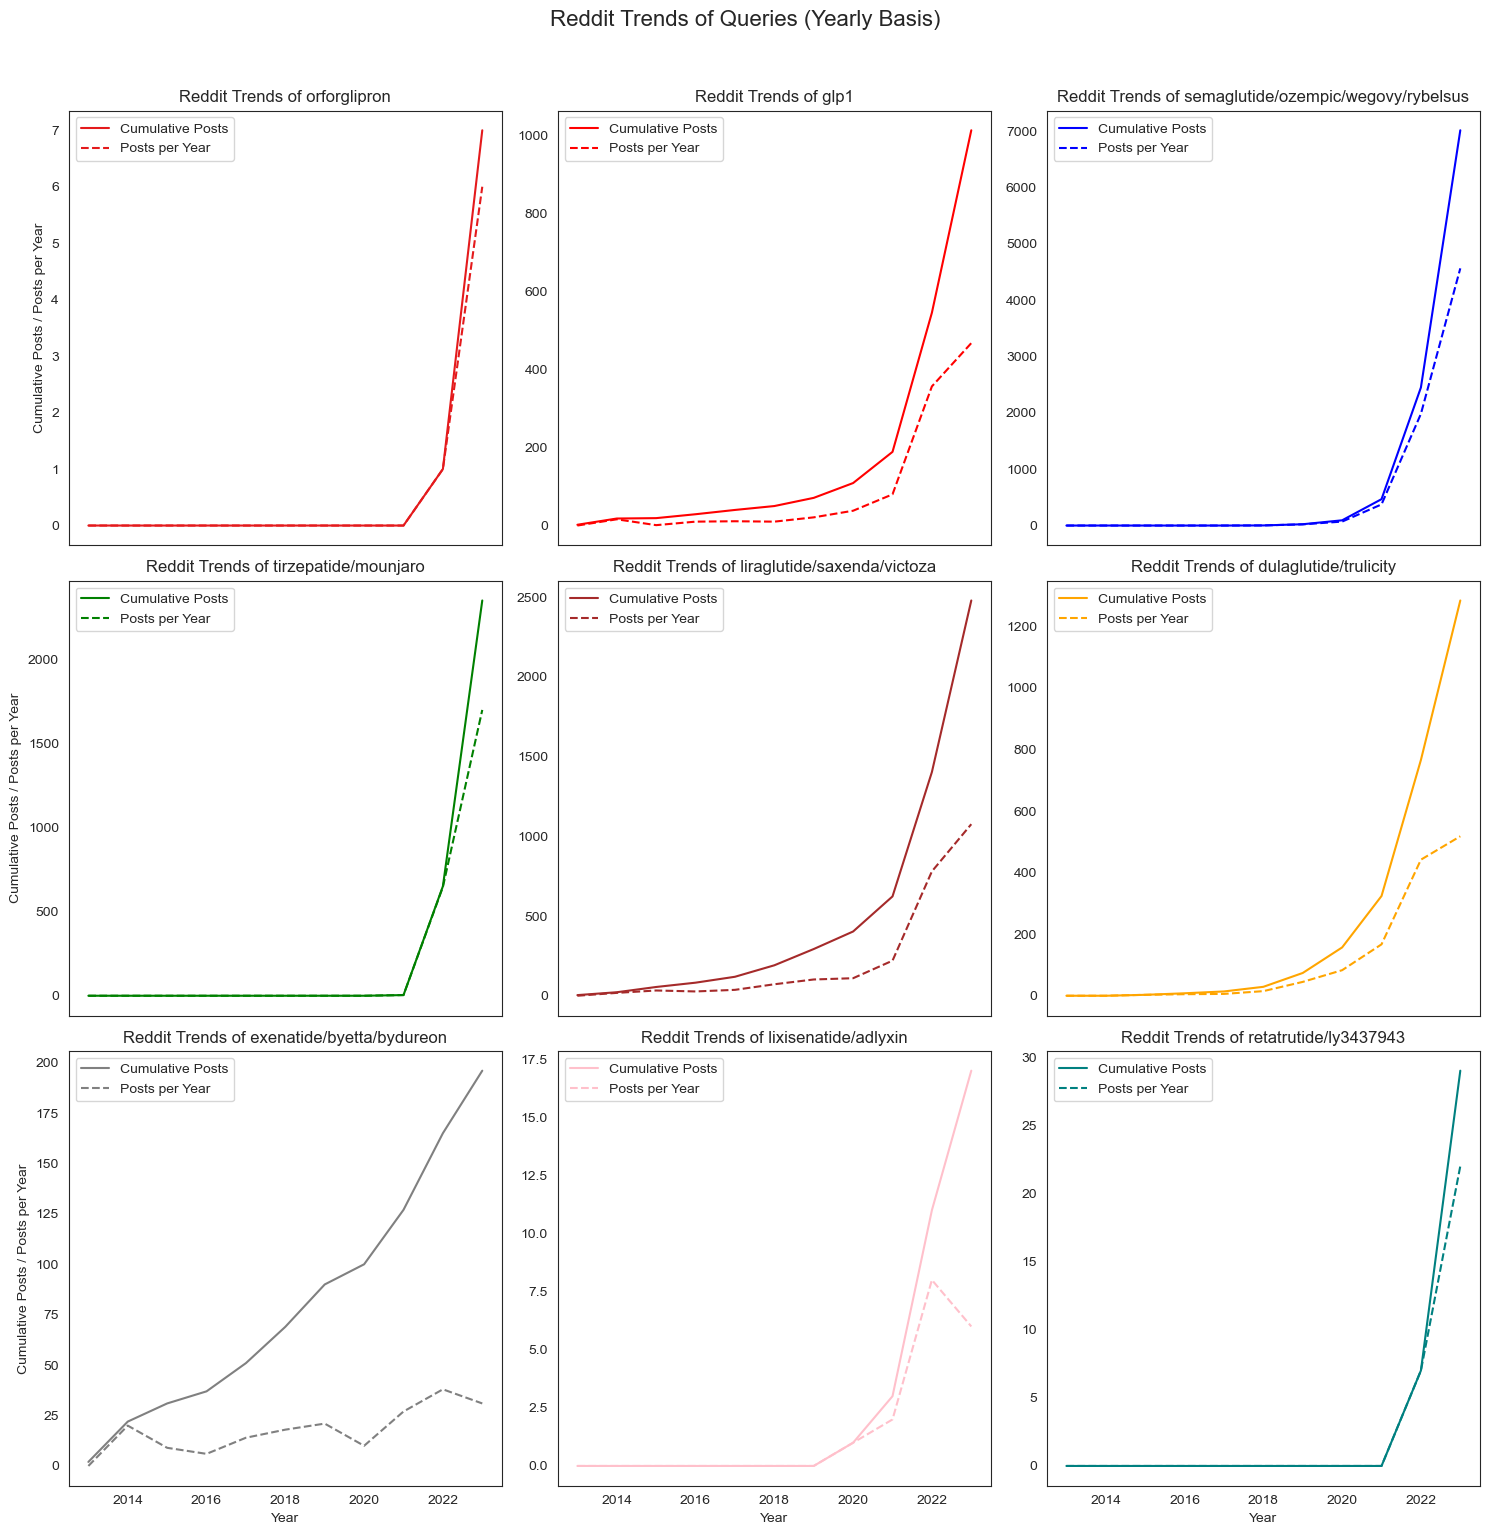

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame named 'data_frame'
# Replace 'data_frame' with your actual DataFrame name

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group data by 'query' and 'year' and count the number of posts
grouped_data = df.groupby(['query', df['date'].dt.year])['query'].count().unstack().fillna(0).cumsum(axis=1)

# Combine similar query categories
grouped_data.loc['glp1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()

# Drop rows related to specific query variations
grouped_data = grouped_data.drop(['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
                                  'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
                                  'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
                                  'adlyxin', 'retatrutide', 'ly3437943'])



# Create a 3x3 grid of subplots
num_queries = len(grouped_data.index)
num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), sharex=True)
palette = sns.color_palette("Set1", n_colors=num_queries)

query_colors = {
    'glp1': 'red',
    'semaglutide/ozempic/wegovy/rybelsus': 'blue',
    'tirzepatide/mounjaro': 'green',
    'liraglutide/saxenda/victoza': 'brown',
    'dulaglutide/trulicity': 'orange',
    'exenatide/byetta/bydureon': 'grey',
    'lixisenatide/adlyxin': 'pink',
    'retatrutide/ly3437943': 'teal',
}

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a common title for all subplots
fig.suptitle("Reddit Trends of Queries (Yearly Basis)", fontsize=16, y=1.02)

# Plotting for each query
for i, (query, ax) in enumerate(zip(grouped_data.index, axes)):
    query_color = query_colors.get(query, palette[i])  # Use specific color if available, else use palette

    ax.plot(grouped_data.columns, grouped_data.loc[query], label='Cumulative Posts', color=query_color)

    grouped_data_diff = grouped_data.diff(axis=1).fillna(0)
    y_values = grouped_data_diff.loc[query]  # Year-to-year change in posts
    # print(y_values)

    ax.plot(grouped_data_diff.columns, y_values, linestyle='dashed', label='Posts per Year', color=query_color)

    ax.set_title(f"Reddit Trends of {query}")

    # ax.set_xlabel('Year')
    # ax.set_ylabel('Interest / Change in Interest')

    # Set y-axis label only for the left-most subplots
    if i % num_cols == 0:
        ax.set_ylabel('Cumulative Posts / Posts per Year')

    # Set x-axis label only for the bottom-most subplots
    if i >= (num_queries - num_cols):
        ax.set_xlabel('Year')

    # Set secondary y-axis label only for the right-most subplots
    # if (i + 1) % num_cols == 0:
    #     ax2.set_ylabel('Posts per Year')

    ax.legend(loc='upper left')

# Set common labels and adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(FIGURE_FOLDER + 'figures/Reddit_Trends_of_Queries_Subplots.png', bbox_inches='tight', transparent=True)
plt.show()


In [60]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# # Load your DataFrame named 'data_frame'
# # Replace 'data_frame' with your actual DataFrame name
#
# # Convert 'date' column to datetime
# df['date'] = pd.to_datetime(df['date'])
#
# # Group data by 'query' and 'year' and sum the number of posts
# grouped_data = df.groupby(['query', df['date'].dt.year])['query'].count().unstack()
#
# # Combine similar query categories
# grouped_data.loc['GLP1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
# grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
# grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
# grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
# grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
# grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
# grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
# grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()
#
# # Drop rows related to specific query variations
# grouped_data = grouped_data.drop(['GLP-1', f'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
#                                   'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
#                                   'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
#                                   'adlyxin', 'retatrutide', 'ly3437943'])
#
# # Reorder rows
# grouped_data = grouped_data.iloc[[0, 2, 4, 5, 1, 6, 7, 3, 8]]
#
# # Calculate year-to-year differences
# grouped_data_diff = grouped_data.diff(axis=1).fillna(0)
#
# # Reset the first timepoint to 0
# grouped_data_diff.iloc[:, 0] = 0
#
# # Plotting
# with sns.plotting_context('notebook'):
#     fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#
#     for query in grouped_data_diff.index:
#         line, = plt.plot(grouped_data_diff.columns, grouped_data_diff.loc[query], label=query)
#
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Change in Posts', labelpad=10)
#     fig.suptitle('Reddit Trends of Post Changes', y=0.95)
#     plt.legend()
#     plt.savefig(FIGURE_FOLDER + 'figures/Reddit_Trends_of_Post_Changes.png', bbox_inches='tight', transparent=True)


In [61]:
df['date_year'] = pd.to_datetime(df['date']).dt.year.astype('int')
years = np.array(df['date_year'].unique(), dtype='int')

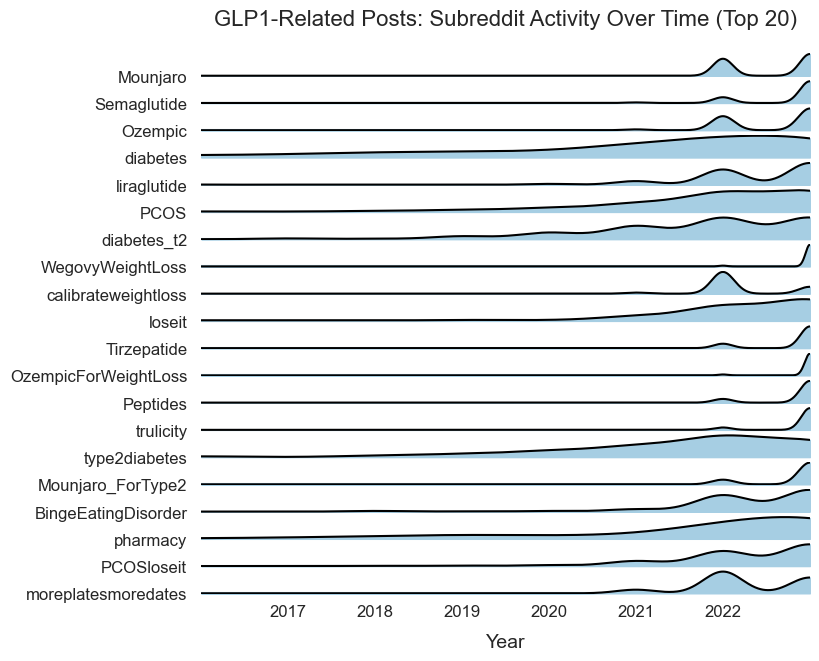

In [62]:
from joypy import joyplot
# from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and 'years' is defined

# Group the DataFrame by 'subreddit' and count the number of rows in each group
subreddit_counts = df.groupby('subreddit').size().reset_index(name='count')

# Sort the subreddits by count in descending order and select the top 20
top_subreddits = subreddit_counts.nlargest(20, 'count')['subreddit']

# Filter the DataFrame for the selected subreddits
filtered_df = df[(df['subreddit'].isin(top_subreddits))]

# Sort the subreddits based on the total count of posts for plotting order
filtered_df['subreddit'] = pd.Categorical(filtered_df['subreddit'], categories=top_subreddits, ordered=True)
filtered_df = filtered_df.sort_values(by='subreddit')

# Create the joyplot
fig1b, ax1b = joyplot(filtered_df.groupby('subreddit'), column='date_year',
                      ylim='own', overlap=0.05, figsize=(8, 6),
                      x_range=(2016, years.max()))  # Starting from 2016

# Set x-axis labels and font size for tick labels
ax1b[-1].set_xticklabels(ax1b[-1].get_xticklabels(), fontsize=config['tick_label'])
ax1b[-1].set_xlabel('Year', fontsize=config['axis_label'], labelpad=10)

# Set font size for y-axis tick labels
for ax1bi in ax1b:
    ax1bi.set_yticklabels(ax1bi.get_yticklabels(), fontsize=config['tick_label'])

# Set the title for the plot
ax1b[0].set_title('GLP1-Related Posts: Subreddit Activity Over Time (Top 20)', fontsize=config['subplot_title'], pad=20)

# Save the plot to a file
plt.savefig('GLP1-Related Posts: Subreddit Activity Over Time (Top 20).png', bbox_inches='tight')

# Display the plot
plt.show()


## Hierarchy Visualization

In [63]:
import pickle

with open(VARIABLE_FOLDER + "topic_model_object_save.pkl", "rb") as f:
    topic_model = pickle.load(f)

In [64]:
def create_figure_2a():

    fig2a = topic_model.visualize_hierarchy(custom_labels=True)

    fig2a = fig2a.update_layout(plot_bgcolor="white",
                                title_font={'size': 1.23 * config['subplot_title']})

    fig2a = fig2a.update_xaxes(tickfont={'size': 1.23 * config['tick_label']},
                               title_font={'size': 1.23 * config['axis_label']})
    fig2a = fig2a.update_yaxes(tickfont={'size': 1.23 * config['tick_label']},
                               title_font={'size': 1.23 * config['axis_label']})

    fig2a.write_image(FIGURE_FOLDER + 'figures/Hierarchical Clustering.png')

    return fig2a

In [65]:
create_figure_2a()

## Topic Clustering

In [66]:
with open(VARIABLE_FOLDER + "c_tf_idf_embed_vis.pkl", "rb") as f:
    c_tf_idf_embed_vis = pickle.load(f)

with open(VARIABLE_FOLDER + "c_tf_idf_embed_clust.pkl", "rb") as f:
    c_tf_idf_embed_clust = pickle.load(f)

with open(VARIABLE_FOLDER + "ideal_n_clusters.pkl", "rb") as f:
    ideal_n_clusters = pickle.load(f)

In [67]:
# ideal_n_clusters

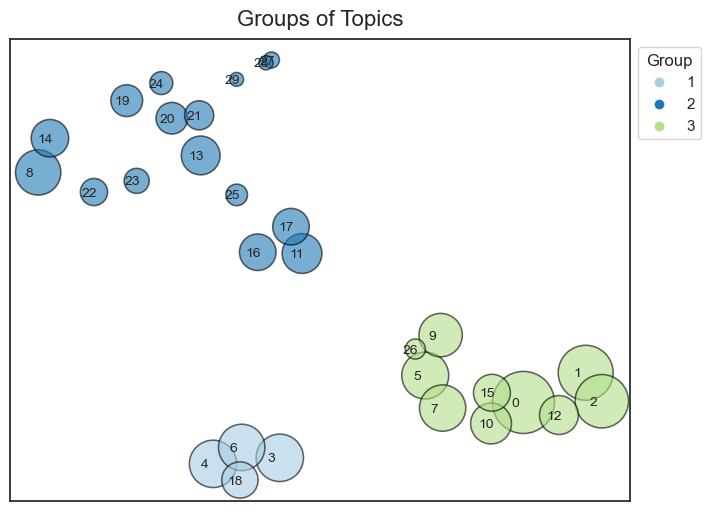

In [68]:
with sns.plotting_context('notebook'):
    # sns.set_style('white')
    plt.figure(figsize=(8,6))
    # Extract the values from the arrays-like objects
    x_values, y_values = c_tf_idf_embed_vis.T
    # print(len(x_values))
    # print(len(y_values))
    # Get the size and hue values
    sizes = topic_model.get_topic_info()['Count'].values
    hue_values = c_tf_idf_embed_clust
    # print(len(sizes))
    # print((len(hue_values)))

    # Create the scatter plot
    ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, hue=hue_values,
                         sizes=(100, 2000), alpha=0.6,
                         legend=True, edgecolor='k', palette='Paired')
    h, l = ax.get_legend_handles_labels()
    for i, coords in enumerate(c_tf_idf_embed_vis):
        ax.annotate(i, coords - [0.09, 0.05], fontsize=10)
    plt.legend(h[0:ideal_n_clusters], l[0:ideal_n_clusters], title='Group', loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_title('Groups of Topics', fontsize=config['subplot_title'], pad=10)
    # ax.set_xlabel('Feature 1')
    # ax.set_ylabel('Feature 2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig(FIGURE_FOLDER + 'figures/Topics Grouped by Similarity of Content.png',  bbox_inches='tight', transparent=True)
    plt.show(ax)

In [69]:
with open(VARIABLE_FOLDER + "subreddit_by_cluster.pkl", "rb") as f:
    subreddit_by_cluster = pickle.load(f)

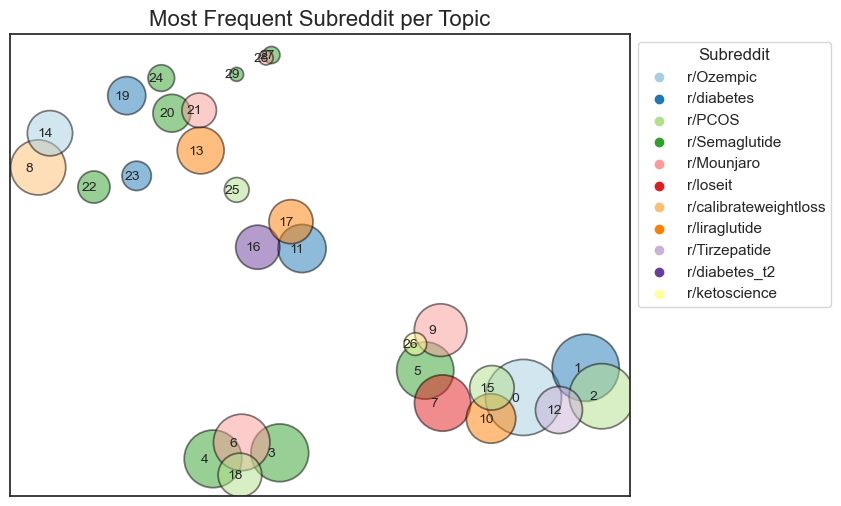

In [70]:
with sns.plotting_context('notebook'):
    # sns.set_style('ticks')
    plt.figure(figsize=(8,6))
    # Extract the values from the arrays-like objects
    x_values, y_values = c_tf_idf_embed_vis.T
    # print(len(x_values))
    # print(len(y_values))

    # Get the size and hue values
    sizes = topic_model.get_topic_info()['Count'].values
    # print(len(sizes))
    hue_values = subreddit_by_cluster
    hue_values = ['r/' + hue_value for hue_value in hue_values]
    # print(len(hue_values))

    # Create the scatter plot
    ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, hue=hue_values,
                         sizes=(100, 3000), alpha=0.5,
                         legend=True, edgecolor='k', palette='Paired')
    ax.set_title('Most Frequent Subreddit per Topic', {'fontsize': 16})
    h, l = ax.get_legend_handles_labels()
    for i, coords in enumerate(c_tf_idf_embed_vis):
        ax.annotate(i, coords - [0.09, 0.05], fontsize=10)
    plt.legend(h[0:-5], l[0:-5], title='Subreddit', loc='upper left', bbox_to_anchor=(1, 1))
    # ax.set_xlabel('Feature 1')
    # ax.set_ylabel('Feature 2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # Remove x ticks
    plt.xticks([])
    # Remove y ticks
    plt.yticks([])
    plt.savefig(FIGURE_FOLDER + 'figures/Most Frequent Subreddit per Topic.png',  bbox_inches='tight', transparent=True)
    plt.show(ax)

In [71]:
with open(VARIABLE_FOLDER + "unique_users_by_cluster.pkl", "rb") as f:
    unique_users_by_cluster = pickle.load(f)

## Sentiment Analysis

In [72]:
with open(VARIABLE_FOLDER + "embeddings.pkl", "rb") as f:
    embeddings = pickle.load(f)

In [73]:
(df.groupby('subreddit')['net_t']).describe().sort_values('subreddit')[['count', 'mean', 'std']].to_excel(
    FIGURE_FOLDER + 'tables/SuppTable2.xlsx')

In [74]:
(df.groupby('query')['net_t']).describe().sort_values('query')[['count', 'mean', 'std']].to_excel(
    FIGURE_FOLDER + 'tables/SuppTable3.xlsx')

/var/folders/jc/7ylsqgrs6qs6ygs_64spgcrc0000gn/T/ipykernel_46388/3812308054.py:26: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



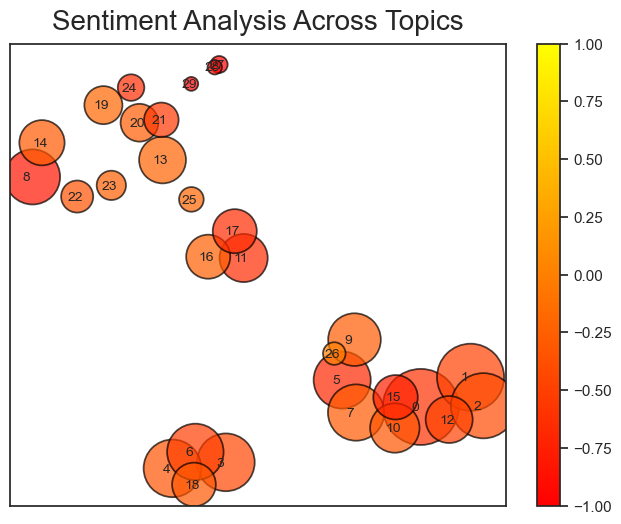

In [75]:
# sentiments = pd.read_excel('data/processed/sentiments.xlsx')

with sns.plotting_context('notebook'):
    sentiment = df.groupby('Topic')['net_t'].mean()
    # print(sentiment.min(), sentiment.max())

    norm = plt.Normalize(-1, 1)
    sm = plt.cm.ScalarMappable(cmap="autumn", norm=norm)
    sm.set_array([])

    x_values, y_values = c_tf_idf_embed_vis.T

    # Get the size and hue values
    sizes = topic_model.get_topic_info()['Count'].values
    hue_values = sentiment

    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(x=x_values, y=y_values, size=sizes, palette='autumn',
                         hue=hue_values, hue_norm=norm, sizes=(100, 3000),
                         alpha=0.7, legend=True, edgecolor='k')
    ax.set_title('Sentiment Analysis Across Topics', fontsize=config['title'], pad=10)
    for i, coords in enumerate(c_tf_idf_embed_vis):
        ax.annotate(i, coords - [0.09, 0.05], fontsize=10)
    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)

    # ax.set_xlabel('Feature 1', fontsize=config['axis_label'])
    # ax.set_ylabel('Feature 2', fontsize=config['axis_label'])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.tick_params(labelsize=config['tick_label'], top=False, bottom=False, left=False)

    plt.savefig(FIGURE_FOLDER + 'figures/Sentiment Analysis Across Topics.png', bbox_inches='tight', transparent=True)

<Figure size 800x600 with 0 Axes>

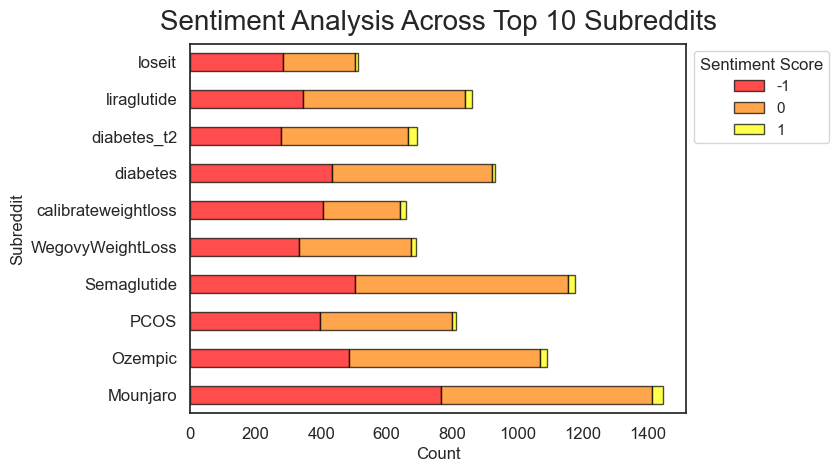

In [76]:
# from matplotlib.pyplot import autumn

with sns.plotting_context('notebook'):
    # Filter for the most prevalent subreddits
    top_subreddits = df['subreddit'].value_counts().head(10).index
    filtered_df = df[df['subreddit'].isin(top_subreddits)]

    # Group the filtered DataFrame by 'subreddit' and 'net_t'
    grouped_df = filtered_df.groupby(['subreddit', 'net_t']).size().unstack().fillna(0)

    # Set up the plot
    plt.figure(figsize=(8, 6))

    # Plot the grouped bar chart
    ax = grouped_df.plot(kind='barh', stacked=True, colormap='autumn',
                         alpha=0.7, legend=True, edgecolor='k')

    # Set the plot title and axes labels
    ax.set_title('Sentiment Analysis Across Top 10 Subreddits', fontsize=config['title'], pad=10)
    plt.ylabel('Subreddit')
    plt.xlabel('Count')

    ax.tick_params(labelsize=config['tick_label'])

    # Set the legend
    plt.legend(title='Sentiment Score', loc='upper left', bbox_to_anchor=(1, 1))

    plt.savefig(FIGURE_FOLDER + 'figures/Sentiment Analysis Across Top 10 Subreddits.png', bbox_inches='tight', transparent=True)
    plt.show()


<Figure size 800x600 with 0 Axes>

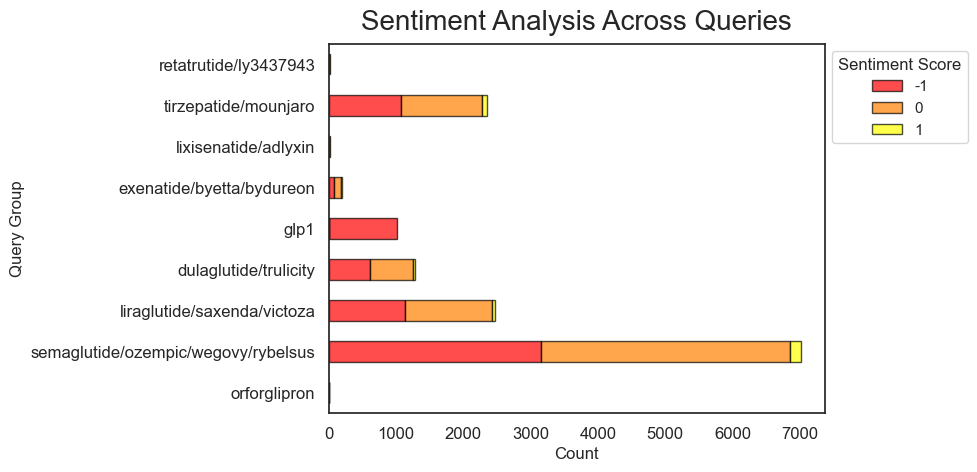

In [77]:
# from matplotlib.pyplot import autumn

with sns.plotting_context('notebook'):

    # Group the DataFrame by 'query' and 'net_t'
    # grouped_df = df.groupby(['query', 'net_t']).size().unstack().fillna(0)

    # Group data by 'query' and 'year' and count the number of posts
    grouped_data = df.groupby(['query', 'net_t']).size().unstack().fillna(0)
    # grouped_data = df.resample('12M').count()

    # Combine similar query categories
    grouped_data.loc['glp1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
    grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
    grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
    grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
    grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
    grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
    grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
    grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()

    # Drop rows related to specific query variations
    grouped_data = grouped_data.drop(['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
                                      'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
                                      'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
                                      'adlyxin', 'retatrutide', 'ly3437943'])

    # Reorder rows
    grouped_data = grouped_data.iloc[[0, 2, 4, 5, 1, 6, 7, 3, 8]]


# Set up the plot
    # plt.figure(figsize=(3,6))
    plt.figure(figsize=(8, 6))

    # Plot the grouped bar chart
    ax = grouped_data.plot(kind='barh', stacked=True, colormap='autumn',
                         alpha=0.7, legend=True, edgecolor='k')

    # Set the plot title and axes labels
    ax.set_title('Sentiment Analysis Across Queries', fontsize=config['title'], pad=10)
    plt.ylabel('Query Group')
    plt.xlabel('Count')

    ax.tick_params(labelsize=config['tick_label'])

    # Set the legend
    plt.legend(title='Sentiment Score', loc='upper left', bbox_to_anchor=(1, 1))

    plt.savefig(FIGURE_FOLDER + 'figures/Sentiment Analysis Across Queries.png', bbox_inches='tight', transparent=True)


## Dendogram

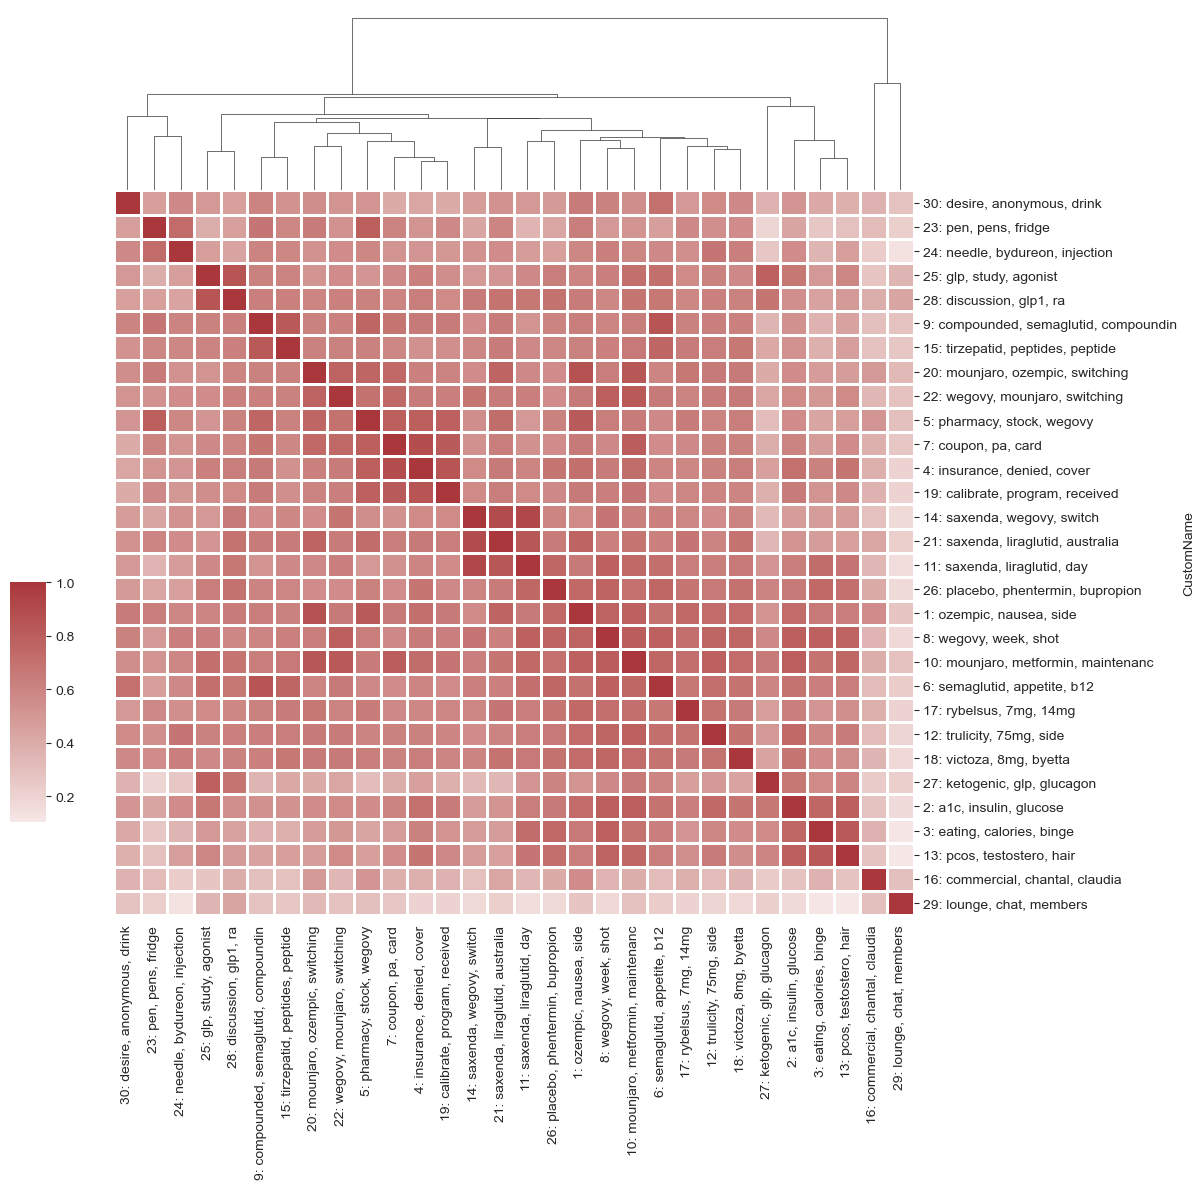

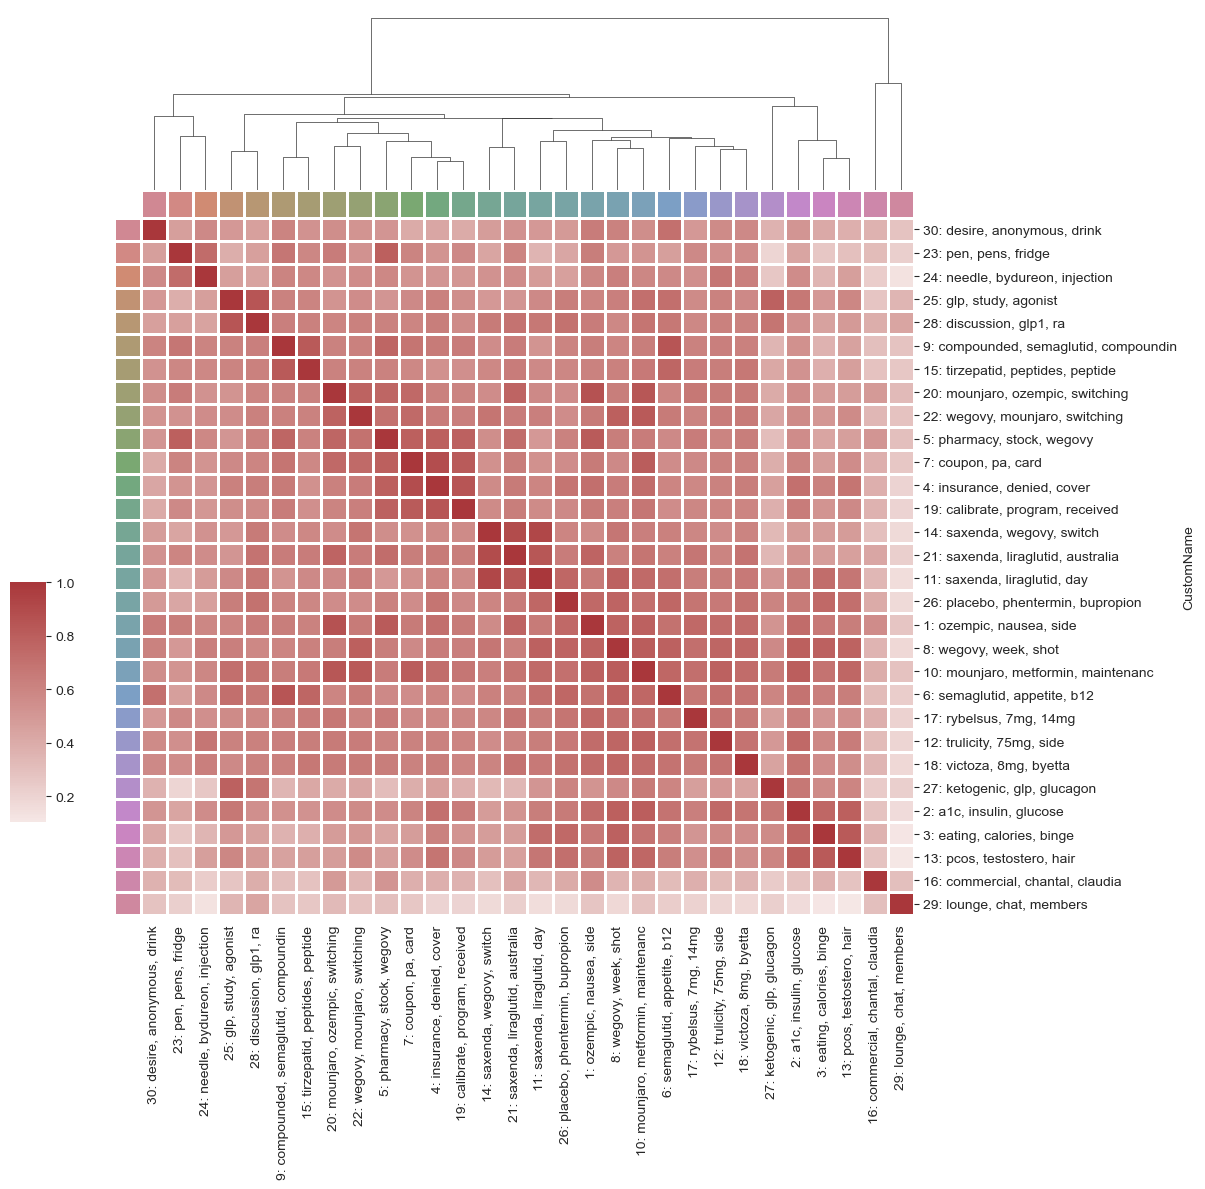

In [78]:
# Load your data from the CSV file
ddg_df = pd.read_csv(DATA_FOLDER + "processed/distance.csv", index_col='CustomName')

# Create a categorical palette
network_pal = sns.husl_palette(ddg_df.shape[0], s=.45)
network_lut = dict(zip(df.index, network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
# network_colors = ddg_df.index.map(network_lut)

# Draw the full plot
g = sns.clustermap(ddg_df, center=0, cmap="vlag",
                   # row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .31, .03, .2),
                   linewidths=.75, figsize=(12, 12))

g.ax_row_dendrogram.remove()

x_tick_labels = [tick.get_text() for tick in g.ax_heatmap.get_xticklabels()]

network_lut = dict(zip(x_tick_labels, network_pal))
network_colors = ddg_df.index.map(network_lut)

# Draw the full plot

g = sns.clustermap(ddg_df, center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .31, .03, .2),
                   linewidths=.75, figsize=(12, 12))

g.ax_row_dendrogram.remove()

plt.show()
g.savefig(FIGURE_FOLDER + 'figures/Dendogram.png', bbox_inches='tight', transparent=True)

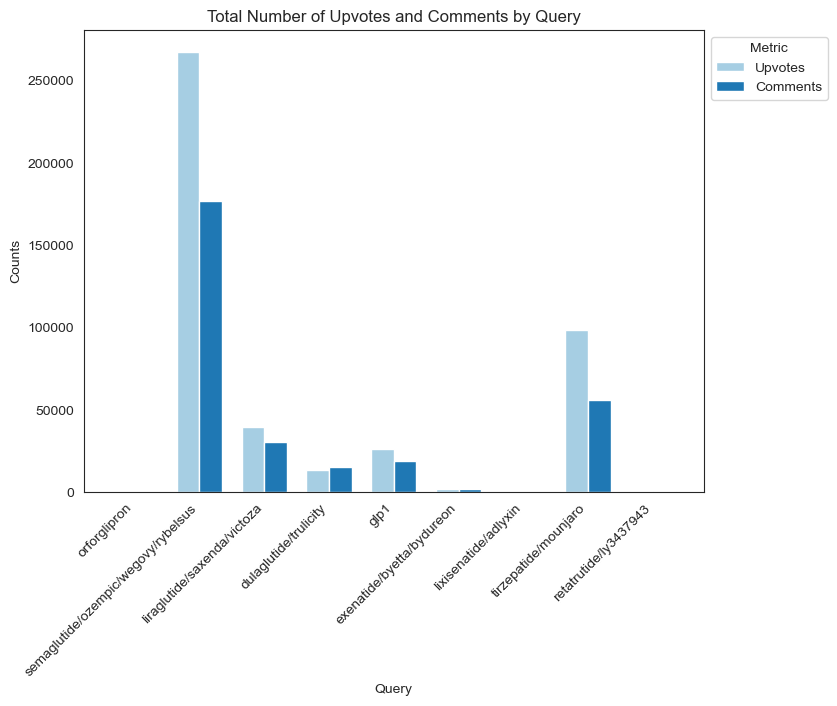

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group data by 'query' and sum upvotes and n_comments
grouped_data = df.groupby('query')[['upvotes', 'n_comments']].sum()

# Combine similar query categories
grouped_data.loc['glp1'] = grouped_data.loc[['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA']].sum()
grouped_data.loc['semaglutide/ozempic/wegovy/rybelsus'] = grouped_data.loc[['semaglutide', 'ozempic', 'wegovy', 'rybelsus']].sum()
grouped_data.loc['tirzepatide/mounjaro'] = grouped_data.loc[['tirzepatide', 'mounjaro']].sum()
grouped_data.loc['liraglutide/saxenda/victoza'] = grouped_data.loc[['liraglutide', 'saxenda', 'victoza']].sum()
grouped_data.loc['dulaglutide/trulicity'] = grouped_data.loc[['dulaglutide', 'trulicity']].sum()
grouped_data.loc['exenatide/byetta/bydureon'] = grouped_data.loc[['exenatide', 'byetta', 'bydureon', 'bydureon bcise']].sum()
grouped_data.loc['lixisenatide/adlyxin'] = grouped_data.loc[['lixisenatide', 'adlyxin']].sum()
grouped_data.loc['retatrutide/ly3437943'] = grouped_data.loc[['retatrutide', 'ly3437943']].sum()

# Drop rows related to specific query variations
grouped_data = grouped_data.drop(['GLP1', 'GLP-1', 'GLP1RA', 'GLP-1RA', 'semaglutide', 'ozempic', 'wegovy', 'rybelsus',
                                  'tirzepatide', 'mounjaro', 'liraglutide', 'saxenda', 'victoza', 'dulaglutide',
                                  'trulicity', 'exenatide', 'byetta', 'bydureon', 'bydureon bcise', 'lixisenatide',
                                  'adlyxin', 'retatrutide', 'ly3437943'])

# Reorder rows
grouped_data = grouped_data.iloc[[0, 2, 4, 5, 1, 6, 7, 3, 8]]

# Get the unique queries for the x-axis
queries = grouped_data.index

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the width for each bar
bar_width = 0.35

# Plotting upvotes and comments as stacked bars
ax.bar(np.arange(len(queries)), grouped_data['upvotes'], width=bar_width, label='Upvotes')
ax.bar(np.arange(len(queries)) + bar_width, grouped_data['n_comments'], width=bar_width, label='Comments')

# Adding labels and title
ax.set_xlabel('Query')
ax.set_ylabel('Counts')
ax.set_title('Total Number of Upvotes and Comments by Query')
ax.set_xticks(np.arange(len(queries)) + bar_width / 2)
ax.set_xticklabels(queries, rotation=45, ha='right')  # Rotate x-axis tick labels
ax.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.savefig(FIGURE_FOLDER + 'figures/Total Number of Upvotes and Comments by Query.png', bbox_inches='tight', transparent=True)
plt.show()


In [80]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
#
# # Assuming your DataFrame is named 'df'
# df['upvotes'] = df['upvotes'].astype(int)
# df['n_comments'] = df['n_comments'].astype(int)
#
# upvotes_by_query = df.groupby('query')['upvotes'].sum()
# n_comments_by_query = df.groupby('query')['n_comments'].sum()
#
# # Get the unique queries for the x-axis
# queries = upvotes_by_query.index
#
# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 6))
#
# # Calculate the width for each bar
# bar_width = 0.35
#
# # Plotting upvotes and comments as stacked bars
# ax.bar(np.arange(len(queries)), upvotes_by_query, width=bar_width, label='Upvotes')
# ax.bar(np.arange(len(queries)) + bar_width, n_comments_by_query, width=bar_width, label='Comments')
#
# # Adding labels and title
# ax.set_xlabel('Query')
# ax.set_ylabel('Counts')
# ax.set_title('Total Number of Upvotes and Comments by Query')
# ax.set_xticks(np.arange(len(queries)) + bar_width / 2)
# ax.set_xticklabels(queries)
# ax.set_xticklabels(queries, rotation=45, ha='right')  # Rotate x-axis tick labels
# ax.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))
#
# # Display the plot
# plt.savefig(FIGURE_FOLDER + 'figures/Total Number of Upvotes and Comments by Query.png', bbox_inches='tight', transparent=True)
# plt.show()


In [81]:
# # Assuming your DataFrame is named 'df'
# df['upvotes'] = df['upvotes'].astype(int)  # Convert 'upvotes' column to integer type
# upvotes_by_query = df.groupby('query')['upvotes'].sum()
# # print(upvotes_by_query)

In [82]:
#upvotes on left axis and comments on right axis

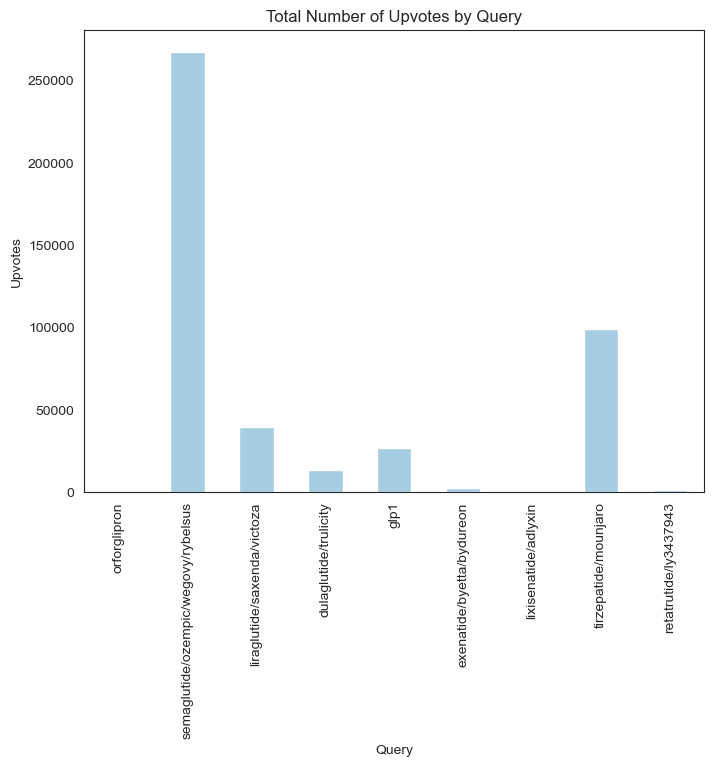

In [83]:
# import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Plotting the data
grouped_data['upvotes'].plot(kind='bar')

# Adding labels and title
plt.xlabel('Query')
plt.ylabel('Upvotes')
plt.title('Total Number of Upvotes by Query')
ax.set_xticklabels(queries, rotation=45, ha='right')  # Rotate x-axis tick labels

# Displaying the plot
plt.savefig(FIGURE_FOLDER + 'figures/Total Number of Upvotes by Query.png',  bbox_inches='tight', transparent=True)
plt.show()

In [84]:
# # Assuming your DataFrame is named 'df'
# df['n_comments'] = df['n_comments'].astype(int)  # Convert 'n_comments' column to integer type
# n_comments_by_query = df.groupby('query')['n_comments'].sum()
# # print(n_comments_by_query)

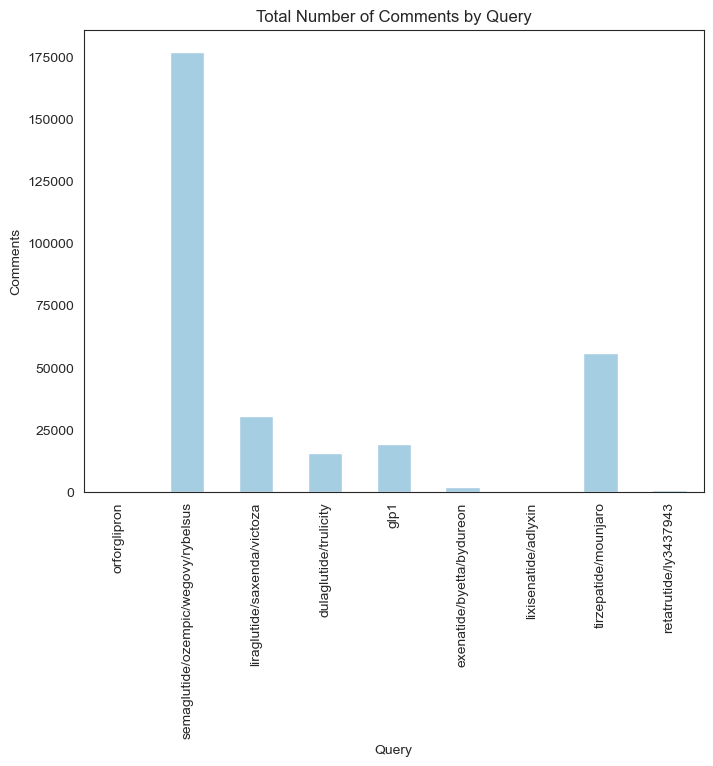

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Plotting the data
grouped_data['n_comments'].plot(kind='bar')

# Adding labels and title
plt.xlabel('Query')
plt.ylabel('Comments')
plt.title('Total Number of Comments by Query')
ax.set_xticklabels(queries, rotation=45, ha='right')  # Rotate x-axis tick labels

# Displaying the plot
plt.savefig(FIGURE_FOLDER + 'figures/Total Number of Comments by Query.png',  bbox_inches='tight', transparent=True)
plt.show()

## Google Trends

In [86]:
# df = pd.read_csv('../multiTimelineEditFinal.csv', header=0)
# df['Month'] = pd.to_datetime(df['Month'])
# df.replace('<1', 0.01, inplace=True)
# for column in df.columns:
#     if column == 'Month':
#         continue
#     df[column] = df[column].astype(int)
#
# # Select columns excluding the first column
# columns_to_plot = df.columns[1:]
# #
# # Calculate the differences between each value and the first value for the selected columns
# df_change_since_first = df[columns_to_plot].sub(df[columns_to_plot].iloc[0])
#
# import matplotlib.pyplot as plt
# # Create a new figure
# plt.figure(figsize=(8, 6))
#
# # Plot each column on the same plot
# for i in df_change_since_first.columns:
#     plt.plot(df['Month'], df_change_since_first[i], label=i)  # Add label to identify each line
#
# # Add legend to the plot
# plt.legend(title='Query Group', loc='upper left', bbox_to_anchor=(1, 1))
#
# # Set title and labels
# plt.title("Google Trends of Queries")
# plt.xlabel("Date")
# plt.ylabel("Change in Interest since June 2013")
#
# # Show the plot
# plt.savefig(FIGURE_FOLDER + 'figures/Google_Trends_of_Queries.png',  bbox_inches='tight', transparent=True)
# plt.show()

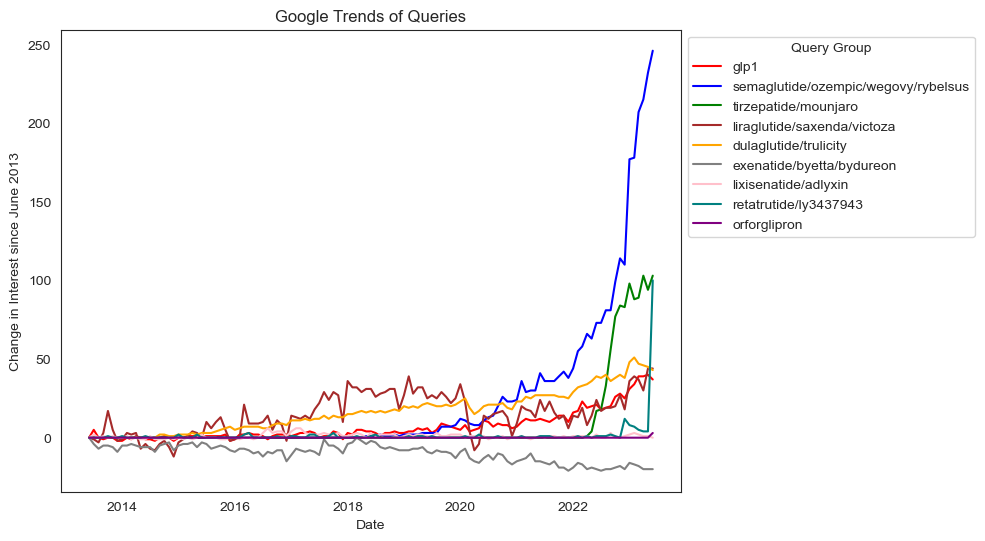

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('../multiTimelineEditFinal.csv', header=0)

# Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Replace '<1' with 0.01 and convert columns to integers
df.replace('<1', 0.01, inplace=True)
for column in df.columns:
    if column == 'Month':
        continue
    df[column] = df[column].astype(int)

# Select columns excluding the first column
columns_to_plot = df.columns[1:]

# Calculate the differences between each value and the first value for the selected columns
df_change_since_first = df[columns_to_plot].sub(df[columns_to_plot].iloc[0])

# Query colors dictionary
query_colors = {
    'glp1': 'red',
    'semaglutide/ozempic/wegovy/rybelsus': 'blue',
    'tirzepatide/mounjaro': 'green',
    'liraglutide/saxenda/victoza': 'brown',
    'dulaglutide/trulicity': 'orange',
    'exenatide/byetta/bydureon': 'grey',
    'lixisenatide/adlyxin': 'pink',
    'retatrutide/ly3437943': 'teal',
    'orforglipron': 'purple',
}

# Plotting with custom colors and sorted queries
with plt.style.context('seaborn-colorblind'):  # Use a colorblind-friendly style
    plt.figure(figsize=(8, 6))

    for query in sorted_queries:
        plt.plot(df['Month'], df_change_since_first[query], label=query, color=query_colors[query])

    plt.legend(title='Query Group', loc='upper left', bbox_to_anchor=(1, 1))
    plt.title("Google Trends of Queries")
    plt.xlabel("Date")
    plt.ylabel("Change in Interest since June 2013")

    plt.savefig(FIGURE_FOLDER + 'figures/Google_Trends_of_Queries.png', bbox_inches='tight', transparent=True)
    plt.show()


In [88]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# # Load and process your DataFrame named 'df'
# # ... (Your DataFrame loading and processing code here)
#
# # Processed DataFrame is assumed to be stored in 'df_google'
# df_google = df[columns_to_plot]
#
# # Create a new figure
# with sns.plotting_context('notebook'):
#     fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#     ax2 = ax.twinx()
#
#     combined_legend_handles = []  # To combine legend handles for both lines
#
#     # Plotting cumulative change for each column
#     for i in df_google.columns:
#         line_cumulative, = ax.plot(df['Month'], df_google[i])
#         combined_legend_handles.append(line_cumulative)  # Add handle to combined legend
#
#     # Calculate year-to-year differences
#     df_change_year_to_year = df_google.diff(axis=0)  # Assuming rows are months
#
#     # Plotting year-to-year change for each column
#     for i in df_change_year_to_year.columns:
#         line_year_to_year, = ax2.plot(df['Month'], df_change_year_to_year[i], linestyle='dashed')
#
#     # Set title and labels
#     ax.set_title("Google Trends of Queries")
#     ax.set_xlabel("Date")
#     ax.set_ylabel('Cumulative Interest (Solid Line)', labelpad=10)
#     ax2.set_ylabel('Change in Interest per Year (Dotted Line)', labelpad=10)  # Label for the twin axis
#
#     # Show the plot
#     plt.tight_layout()
#     plt.savefig(FIGURE_FOLDER + 'figures/Combined_Google_Trends.png', bbox_inches='tight', transparent=True)
#     plt.show()


In [89]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# # Load and process your DataFrame named 'df'
# # ... (Your DataFrame loading and processing code here)
#
# # df['Year'] = df['Month'].dt.year
#
# # Processed DataFrame is assumed to be stored in 'df_google'
# df_google = df[columns_to_plot]
#
# # df_change_year_to_year = df_google.groupby('Year').diff()
#
#
# # Define the query colors
# query_colors = {
#     'glp1': 'red',
#     'semaglutide/ozempic/wegovy/rybelsus': 'blue',
#     'tirzepatide/mounjaro': 'green',
#     'liraglutide/saxenda/victoza': 'brown',
#     'dulaglutide/trulicity': 'orange',
#     'exenatide/byetta/bydureon': 'grey',
#     'lixisenatide/adlyxin': 'pink',
#     'retatrutide/ly3437943': 'teal',
#     'orforglipron': 'purple',
# }
#
# # Create a 3x3 grid of subplots for each column
# fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# palette = sns.color_palette("Set1", n_colors=len(df_google.columns))
#
# # Flatten the axes array for easier iteration
# axes = axes.flatten()
#
# # Number of columns and queries
# num_cols = 3
#
# # Create a common title for all subplots
# fig.suptitle("Google Trends of Queries", fontsize=16, y=1.02)
#
# # Plotting cumulative change and year-to-year change for each column
# for i, (column, ax) in enumerate(zip(df_google.columns, axes)):
#     # Use query-specific color from the defined palette
#     query_color = query_colors.get(column, palette[i])
#
#     # Apply formatting from the second graph
#     ax2 = ax.twinx()
#
#     # Plot year-to-year change
#     df_change_year_to_year = df_google.diff(axis=0)  # Assuming rows are months
#     y_values = df_change_year_to_year[column] + i * 5  # Stagger y-values
#     ax2.plot(df['Month'], y_values, linestyle='dashed', label='Change in Interest per Month', color=query_color)
#     # y_values = df_change_year_to_year[column]
#     # ax2.plot(df['Year'], y_values, linestyle='dashed', label='Change in Interest per Year', color=query_color)
#
#
#     # Plot cumulative interest
#     ax.plot(df['Month'], df_google[column], label='Cumulative Interest', color=query_color)
#
#     lines, labels = ax.get_legend_handles_labels()
#     lines2, labels2 = ax2.get_legend_handles_labels()
#     ax2.legend(lines + lines2, labels + labels2, loc='upper left')  # Combine legends
#
#     ax.set_title(f"Google Trends of {column}")
#
#     ax.set_xlabel('Month')
#     ax.set_ylabel('Cumulative Interest')
#
#     ax2.set_ylabel('Change in Interest per Year')
#
#
# plt.tight_layout()
#
# # Save the figure
# # plt.savefig(FIGURE_FOLDER + 'figures/Combined_Google_Trends_Subplots.png', bbox_inches='tight', transparent=True)
# plt.show()


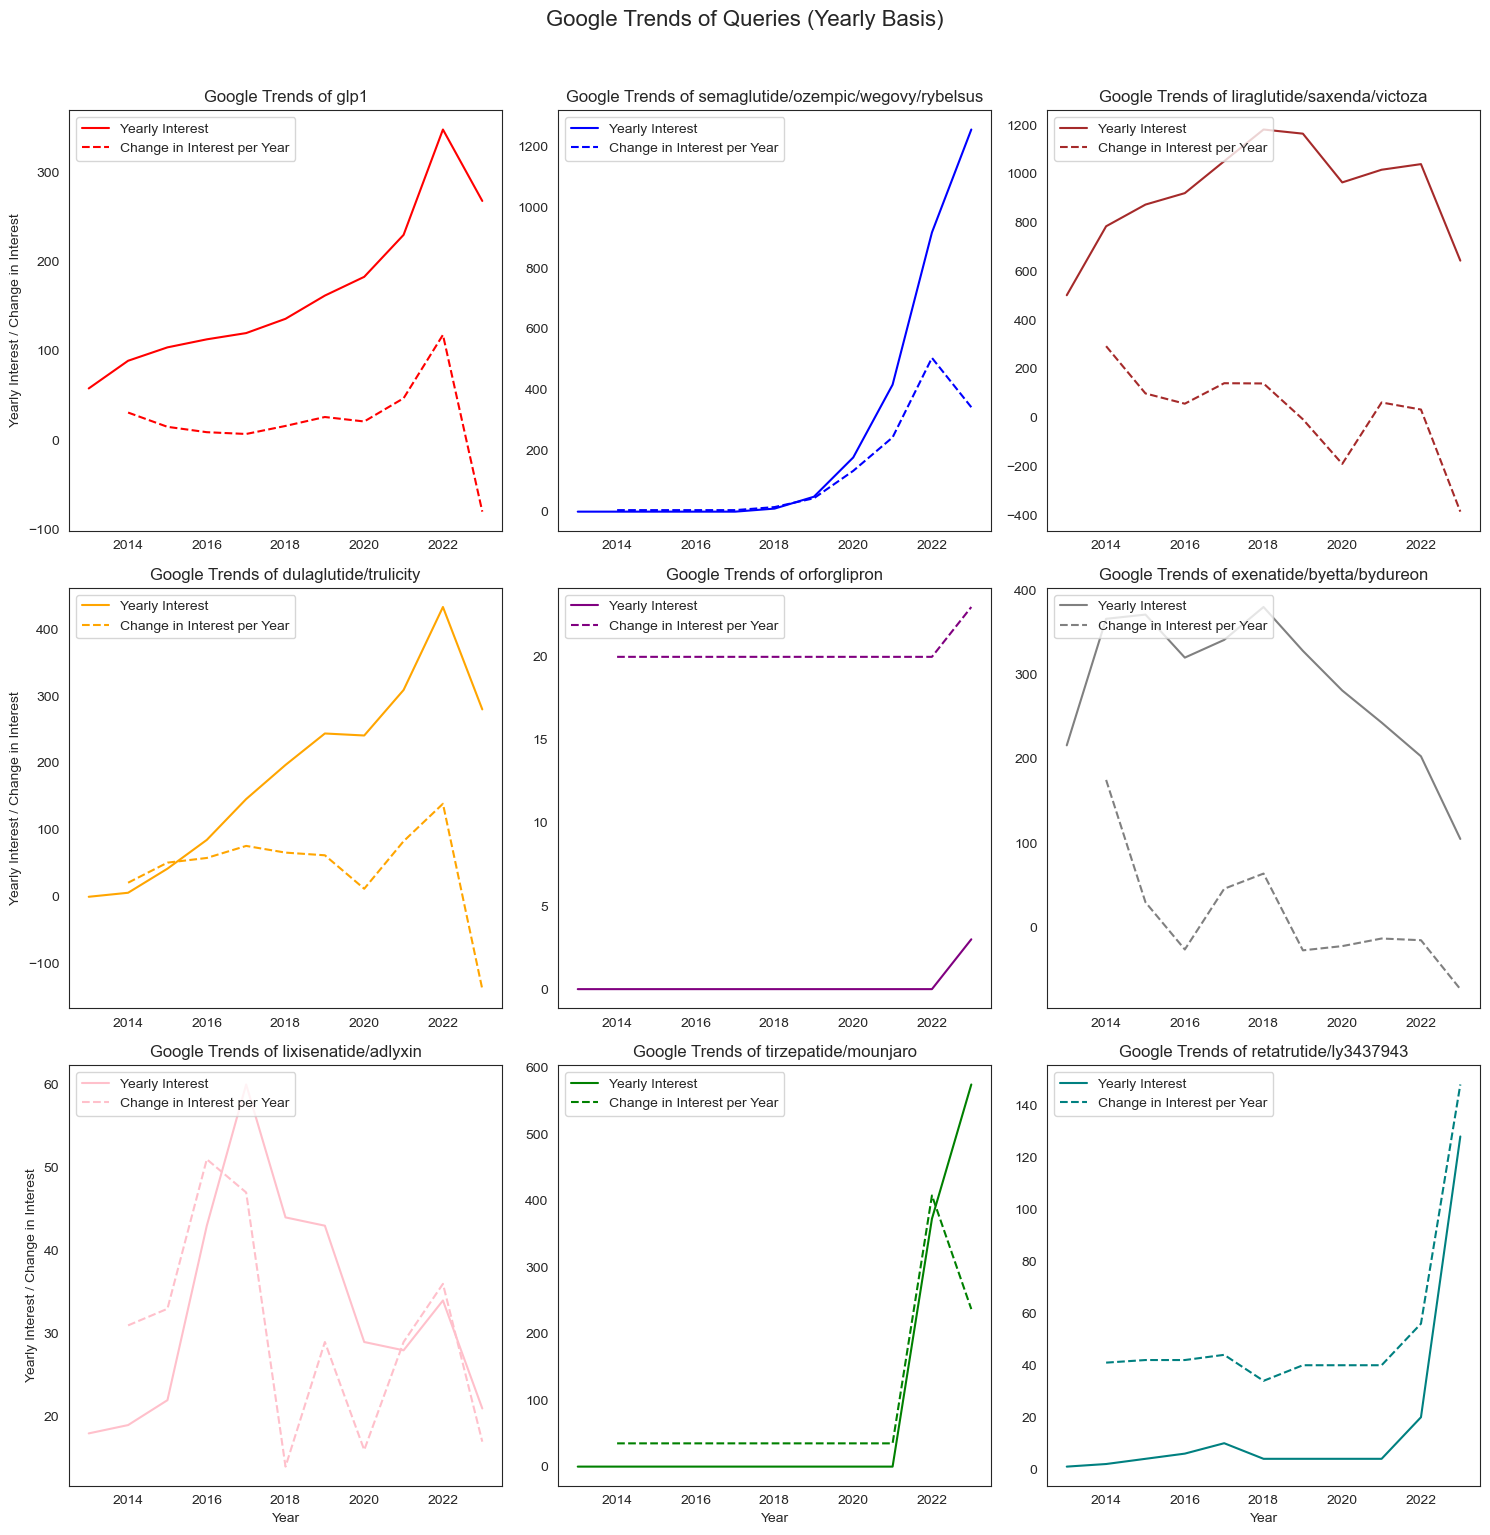

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process your DataFrame named 'df'
# ... (Your DataFrame loading and processing code here)

# Assuming 'Month' is a datetime column in your DataFrame
df['Year'] = df['Month'].dt.year

# Processed DataFrame is assumed to be stored in 'df_google'
df_google = df[columns_to_plot]

# Calculate the sum of each query's interest per year
df_google_yearly = df_google.groupby(df['Year']).sum()

# Define the query colors
query_colors = {
    'glp1': 'red',
    'semaglutide/ozempic/wegovy/rybelsus': 'blue',
    'tirzepatide/mounjaro': 'green',
    'liraglutide/saxenda/victoza': 'brown',
    'dulaglutide/trulicity': 'orange',
    'exenatide/byetta/bydureon': 'grey',
    'lixisenatide/adlyxin': 'pink',
    'retatrutide/ly3437943': 'teal',
    'orforglipron': 'purple',
}

# Create a 3x3 grid of subplots for each column
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
palette = sns.color_palette("Set1", n_colors=len(df_google_yearly.columns))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a common title for all subplots
fig.suptitle("Google Trends of Queries (Yearly Basis)", fontsize=16, y=1.02)

# Plotting yearly interest and year-to-year change for each query
for i, (column, ax) in enumerate(zip(df_google_yearly.columns, axes)):
    # Use query-specific color from the defined palette
    query_color = query_colors.get(column, palette[i])

    # Plot yearly interest
    ax.plot(df_google_yearly.index, df_google_yearly[column], label='Yearly Interest', color=query_color)

    # Plot year-to-year change
    df_change_year_to_year = df_google_yearly.diff()
    y_values = df_change_year_to_year[column] + i * 5  # Stagger y-values
    ax.plot(df_google_yearly.index, y_values, linestyle='dashed', label='Change in Interest per Year', color=query_color)

    ax.set_title(f"Google Trends of {column}")

    # ax.set_xlabel('Year')
    # ax.set_ylabel('Interest / Change in Interest')

    # Set y-axis label only for the left-most subplots
    if i % num_cols == 0:
        ax.set_ylabel('Yearly Interest / Change in Interest')

    # Set x-axis label only for the bottom-most subplots
    if i >= (num_queries - num_cols):
        ax.set_xlabel('Year')

    ax.legend(loc='upper left')

plt.tight_layout()

# Save the figure
# plt.savefig(FIGURE_FOLDER + 'figures/Combined_Google_Trends_Yearly_Subplots.png', bbox_inches='tight', transparent=True)
plt.show()


In [91]:
df_google_yearly

,glp1,semaglutide/ozempic/wegovy/rybelsus,liraglutide/saxenda/victoza,dulaglutide/trulicity,orforglipron,exenatide/byetta/bydureon,lixisenatide/adlyxin,tirzepatide/mounjaro,retatrutide/ly3437943
Year,,,,,,,,,
2013,58,0,502,0,0,216,18,0,1
2014,89,0,785,6,0,366,19,0,2
2015,104,0,874,42,0,371,22,0,4
2016,113,0,921,85,0,320,43,0,6
2017,120,0,1052,146,0,341,60,0,10
2018,136,10,1182,197,0,380,44,0,4
2019,162,49,1165,244,0,328,43,0,4
2020,183,178,965,241,0,281,29,0,4
2021,230,417,1017,309,0,243,28,0,4


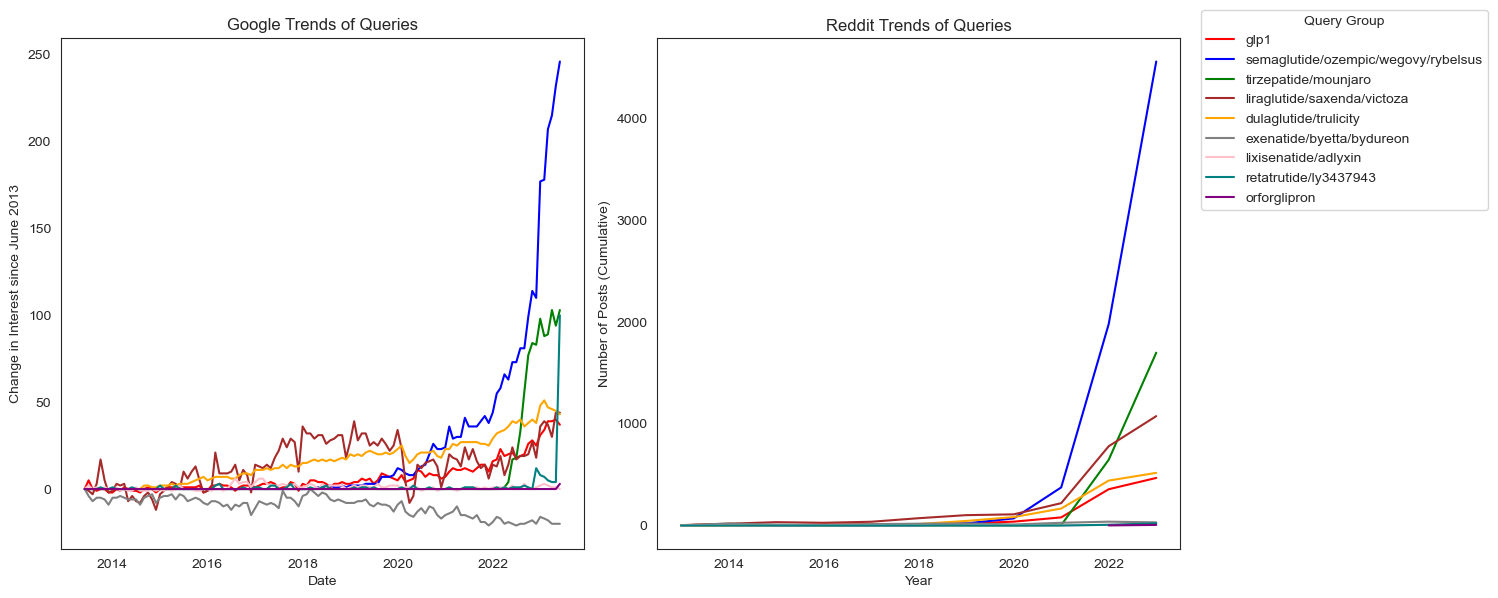

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data and settings (replace with your actual data)
# sorted_queries = ['query1', 'query2', 'query3']
# query_colors = {'query1': 'blue', 'query2': 'green', 'query3': 'red'}

# Create a 1x2 subplot layout
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for query in sorted_queries:
    axs[0].plot(df['Month'], df_change_since_first[query], label=query, color=query_colors[query])

axs[0].set_title("Google Trends of Queries")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Change in Interest since June 2013")

for query in sorted_queries:
    axs[1].plot(grouped_data_reddit.columns, grouped_data_reddit.loc[query], label=query, color=query_colors[query])

axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Posts (Cumulative)')
axs[1].set_title('Reddit Trends of Queries')

# Add a common legend outside the subplots
handles, labels = axs[0].get_legend_handles_labels()
common_legend = fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.25, 1), title='Query Group')

# Adjust layout to make space for the common legend
plt.subplots_adjust(top=0.85)

# Show the plot
plt.tight_layout()
plt.savefig(FIGURE_FOLDER + 'figures/Combined_Google_Reddit_Trends.png', bbox_inches='tight', transparent=True)
plt.show()
